# Artificial Intelligence Nanodegree
## Recurrent Neural Network Projects

Welcome to the Recurrent Neural Network Project in the Artificial Intelligence Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Implementation TODOs in this notebook

This notebook contains two problems, cut into a variety of TODOs.  Make sure to complete each section containing a TODO marker throughout the notebook.  For convenience we provide links to each of these sections below.

[TODO #1: Implement a function to window time series](#TODO_1)

[TODO #2: Create a simple RNN model using keras to perform regression](#TODO_2)

[TODO #3: Finish cleaning a large text corpus](#TODO_3)

[TODO #4: Implement a function to window a large text corpus](#TODO_4)

[TODO #5: Create a simple RNN model using keras to perform multiclass classification](#TODO_5)

[TODO #6: Generate text using a fully trained RNN model and a variety of input sequences](#TODO_6)


# Problem 1: Perform time series prediction 

In this project you will perform time series prediction using a Recurrent Neural Network regressor.  In particular you will re-create the figure shown in the notes - where the stock price of Apple was forecasted (or predicted) 7 days in advance.  In completing this exercise you will learn how to construct RNNs using Keras, which will also aid in completing the second project in this notebook.

The particular network architecture we will employ for our RNN is known as  [Long Term Short Memory (LSTM)](https://en.wikipedia.org/wiki/Long_short-term_memory), which helps significantly avoid technical problems with optimization of RNNs.  

## 1.1 Getting started

First we must load in our time series - a history of around 140 days of Apple's stock price.  Then we need to perform a number of pre-processing steps to prepare it for use with an RNN model.  First off, it is good practice to normalize time series - by normalizing its range.  This helps us avoid serious numerical issues associated how common activation functions (like tanh) transform very large (positive or negative) numbers, as well as helping us to avoid related issues when computing derivatives.

Here we normalize the series to lie in the range [0,1] [using this scikit function](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), but it is also commonplace to normalize by a series standard deviation.

In [1]:
### Load in necessary libraries for data input and normalization
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from my_answers import *

%load_ext autoreload
%autoreload 2

from my_answers import *

### load in and normalize the dataset
dataset = np.loadtxt('datasets/normalized_apple_prices.csv')

Using TensorFlow backend.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Lets take a quick look at the (normalized) time series we'll be performing predictions on.

Text(0,0.5,'normalized series value')

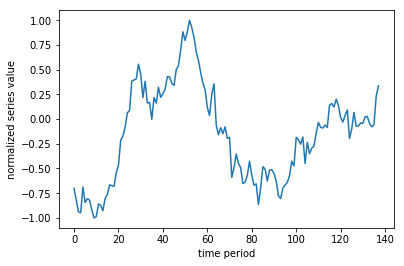

In [2]:
# lets take a look at our time series
plt.plot(dataset)
plt.xlabel('time period')
plt.ylabel('normalized series value')

## 1.2  Cutting our time series into sequences

Remember, our time series is a sequence of numbers that we can represent in general mathematically as 

$$s_{0},s_{1},s_{2},...,s_{P}$$

where $s_{p}$ is the numerical value of the time series at time period $p$ and where $P$ is the total length of the series.  In order to apply our RNN we treat the time series prediction problem as a regression problem, and so need to use a sliding window to construct a set of associated input/output pairs to regress on.  This process is animated in the gif below.

<img src="images/timeseries_windowing_training.gif" width=600 height=600/>

For example - using a window of size T = 5 (as illustrated in the gif above) we produce a set of input/output pairs like the one shown in the table below

$$\begin{array}{c|c}
\text{Input} & \text{Output}\\
\hline \color{CornflowerBlue} {\langle s_{1},s_{2},s_{3},s_{4},s_{5}\rangle} & \color{Goldenrod}{ s_{6}} \\
\ \color{CornflowerBlue} {\langle s_{2},s_{3},s_{4},s_{5},s_{6} \rangle } & \color{Goldenrod} {s_{7} } \\
\color{CornflowerBlue}  {\vdots} & \color{Goldenrod} {\vdots}\\
\color{CornflowerBlue} { \langle s_{P-5},s_{P-4},s_{P-3},s_{P-2},s_{P-1} \rangle } & \color{Goldenrod} {s_{P}}
\end{array}$$

Notice here that each input is a sequence (or vector) of length 5 (and in general has length equal to the window size T) while each corresponding output is a scalar value.  Notice also how given a time series of length P and window size T = 5 as shown above, we created P - 5  input/output pairs.  More generally, for a window size T we create P - T such pairs.

Now its time for you to window the input time series as described above!  

<a id='TODO_1'></a>

**TODO:** Implement the function called **window_transform_series** in my_answers.py so that it runs a sliding window along the input series and creates associated input/output pairs.    Note that this function should input a) the series and b) the window length, and return the input/output subsequences.  Make sure to format returned input/output as generally shown in table above (where window_size = 5), and make sure your returned input is a numpy array.

-----

You can test your function on the list of odd numbers given below

In [3]:
odd_nums = np.array([1,3,5,7,9,11,13])

Here is a hard-coded solution for odd_nums.  You can compare its results with what you get from your **window_transform_series** implementation.

In [4]:
# run a window of size 2 over the odd number sequence and display the results
window_size = 2

X = []
X.append(odd_nums[0:2])
X.append(odd_nums[1:3])
X.append(odd_nums[2:4])
X.append(odd_nums[3:5])
X.append(odd_nums[4:6])

y = odd_nums[2:]

X = np.asarray(X)
y = np.asarray(y)
y = np.reshape(y, (len(y),1)) #optional

assert(type(X).__name__ == 'ndarray')
assert(type(y).__name__ == 'ndarray')
assert(X.shape == (5,2))
assert(y.shape in [(5,1), (5,)])

# print out input/output pairs --> here input = X, corresponding output = y
print ('--- the input X will look like ----')
print (X)

print ('--- the associated output y will look like ----')
print (y)

--- the input X will look like ----
[[ 1  3]
 [ 3  5]
 [ 5  7]
 [ 7  9]
 [ 9 11]]
--- the associated output y will look like ----
[[ 5]
 [ 7]
 [ 9]
 [11]
 [13]]


Again - you can check that your completed **window_transform_series** function works correctly by trying it on the odd_nums sequence - you should get the above output.

In [5]:
### TODO: implement the function window_transform_series in the file my_answers.py
from my_answers import window_transform_series

With this function in place apply it to the series in the Python cell below.  We use a window_size = 7 for these experiments.

In [6]:
# window the data using your windowing function
window_size = 7
X,y = window_transform_series(series = dataset,window_size = window_size)
print (X, y)

[[-0.70062339 -0.82088484 -0.93938305 -0.9471652  -0.68785527 -0.84325902
  -0.80532018]
 [-0.82088484 -0.93938305 -0.9471652  -0.68785527 -0.84325902 -0.80532018
  -0.82058073]
 [-0.93938305 -0.9471652  -0.68785527 -0.84325902 -0.80532018 -0.82058073
  -0.92023124]
 [-0.9471652  -0.68785527 -0.84325902 -0.80532018 -0.82058073 -0.92023124
  -1.        ]
 [-0.68785527 -0.84325902 -0.80532018 -0.82058073 -0.92023124 -1.
  -0.98814438]
 [-0.84325902 -0.80532018 -0.82058073 -0.92023124 -1.         -0.98814438
  -0.85961411]
 [-0.80532018 -0.82058073 -0.92023124 -1.         -0.98814438 -0.85961411
  -0.8706188 ]
 [-0.82058073 -0.92023124 -1.         -0.98814438 -0.85961411 -0.8706188
  -0.92661512]
 [-0.92023124 -1.         -0.98814438 -0.85961411 -0.8706188  -0.92661512
  -0.80118585]
 [-1.         -0.98814438 -0.85961411 -0.8706188  -0.92661512 -0.80118585
  -0.76288204]
 [-0.98814438 -0.85961411 -0.8706188  -0.92661512 -0.80118585 -0.76288204
  -0.66499478]
 [-0.85961411 -0.8706188  -0.9

## 1.3  Splitting into training and testing sets

In order to perform proper testing on our dataset we will lop off the last 1/3 of it for validation (or testing).  This is that once we train our model we have something to test it on (like any regression problem!).  This splitting into training/testing sets is done in the cell below.

Note how here we are **not** splitting the dataset *randomly* as one typically would do when validating a regression model.  This is because our input/output pairs *are related temporally*.   We don't want to validate our model by training on a random subset of the series and then testing on another random subset, as this simulates the scenario that we receive new points *within the timeframe of our training set*.  

We want to train on one solid chunk of the series (in our case, the first full 2/3 of it), and validate on a later chunk (the last 1/3) as this simulates how we would predict *future* values of a time series.

In [7]:
# split our dataset into training / testing sets
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

<a id='TODO_2'></a>

## 1.4  Build and run an RNN regression model

Having created input/output pairs out of our time series and cut this into training/testing sets, we can now begin setting up our RNN.  We use Keras to quickly build a two hidden layer RNN of the following specifications

- layer 1 uses an LSTM module with 5 hidden units (note here the input_shape = (window_size,1))
- layer 2 uses a fully connected module with one unit
- the 'mean_squared_error' loss should be used (remember: we are performing regression here)

This can be constructed using just a few lines - see e.g., the [general Keras documentation](https://keras.io/getting-started/sequential-model-guide/) and the [LSTM documentation in particular](https://keras.io/layers/recurrent/) for examples of how to quickly use Keras to build neural network models.  Make sure you are initializing your optimizer given the [keras-recommended approach for RNNs](https://keras.io/optimizers/) 

(given in the cell below).  (remember to copy your completed function into the script *my_answers.py* function titled *build_part1_RNN* before submitting your project)

In [8]:
### TODO: create required RNN model
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
np.random.seed(0)


# TODO: implement build_part1_RNN in my_answers.py
from my_answers import build_part1_RNN
model = build_part1_RNN(window_size)

# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.00005, rho=0.6, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

With your model built you can now fit the model by activating the cell below!  Note: the number of epochs (np_epochs) and batch_size are preset (so we can all produce the same results).  You can choose to toggle the verbose parameter - which gives you regular updates on the progress of the algorithm - on and off by setting it to 1 or 0 respectively.

In [9]:
# run your model!
model.fit(X_train, y_train, epochs=5000, batch_size=100, verbose=1)

Epoch 1/5000
88/88 [==============================] - 2s - loss: 0.1440
Epoch 2/5000
88/88 [==============================] - 0s - loss: 0.1438
Epoch 3/5000
88/88 [==============================] - 0s - loss: 0.1437
Epoch 4/5000
88/88 [==============================] - 0s - loss: 0.1436
Epoch 5/5000
88/88 [==============================] - 0s - loss: 0.1435
Epoch 6/5000
88/88 [==============================] - 0s - loss: 0.1435
Epoch 7/5000
88/88 [==============================] - 0s - loss: 0.1434
Epoch 8/5000
88/88 [==============================] - 0s - loss: 0.1433
Epoch 9/5000
88/88 [==============================] - 0s - loss: 0.1432
Epoch 10/5000
88/88 [==============================] - 0s - loss: 0.1431
Epoch 11/5000
88/88 [==============================] - 0s - loss: 0.1430
Epoch 12/5000
88/88 [==============================] - 0s - loss: 0.1429
Epoch 13/5000
88/88 [==============================] - 0s - loss: 0.1429
Epoch 14/5000
88/88 [==============================] - 0s - 

88/88 [==============================] - 0s - loss: 0.1346
Epoch 114/5000
88/88 [==============================] - 0s - loss: 0.1345
Epoch 115/5000
88/88 [==============================] - 0s - loss: 0.1344
Epoch 116/5000
88/88 [==============================] - 0s - loss: 0.1343
Epoch 117/5000
88/88 [==============================] - 0s - loss: 0.1343
Epoch 118/5000
88/88 [==============================] - 0s - loss: 0.1342
Epoch 119/5000
88/88 [==============================] - 0s - loss: 0.1341
Epoch 120/5000
88/88 [==============================] - 0s - loss: 0.1340
Epoch 121/5000
88/88 [==============================] - 0s - loss: 0.1339
Epoch 122/5000
88/88 [==============================] - 0s - loss: 0.1339
Epoch 123/5000
88/88 [==============================] - 0s - loss: 0.1338
Epoch 124/5000
88/88 [==============================] - 0s - loss: 0.1337
Epoch 125/5000
88/88 [==============================] - 0s - loss: 0.1336
Epoch 126/5000
88/88 [==============================]

88/88 [==============================] - 0s - loss: 0.1260
Epoch 224/5000
88/88 [==============================] - 0s - loss: 0.1259
Epoch 225/5000
88/88 [==============================] - 0s - loss: 0.1258
Epoch 226/5000
88/88 [==============================] - 0s - loss: 0.1258
Epoch 227/5000
88/88 [==============================] - 0s - loss: 0.1257
Epoch 228/5000
88/88 [==============================] - 0s - loss: 0.1256
Epoch 229/5000
88/88 [==============================] - 0s - loss: 0.1255
Epoch 230/5000
88/88 [==============================] - 0s - loss: 0.1254
Epoch 231/5000
88/88 [==============================] - 0s - loss: 0.1254
Epoch 232/5000
88/88 [==============================] - 0s - loss: 0.1253
Epoch 233/5000
88/88 [==============================] - 0s - loss: 0.1252
Epoch 234/5000
88/88 [==============================] - 0s - loss: 0.1251
Epoch 235/5000
88/88 [==============================] - 0s - loss: 0.1251
Epoch 236/5000
88/88 [==============================]

88/88 [==============================] - 0s - loss: 0.1177
Epoch 334/5000
88/88 [==============================] - 0s - loss: 0.1176
Epoch 335/5000
88/88 [==============================] - 0s - loss: 0.1175
Epoch 336/5000
88/88 [==============================] - 0s - loss: 0.1174
Epoch 337/5000
88/88 [==============================] - 0s - loss: 0.1174
Epoch 338/5000
88/88 [==============================] - 0s - loss: 0.1173
Epoch 339/5000
88/88 [==============================] - 0s - loss: 0.1172
Epoch 340/5000
88/88 [==============================] - 0s - loss: 0.1172
Epoch 341/5000
88/88 [==============================] - 0s - loss: 0.1171
Epoch 342/5000
88/88 [==============================] - 0s - loss: 0.1170
Epoch 343/5000
88/88 [==============================] - 0s - loss: 0.1169
Epoch 344/5000
88/88 [==============================] - 0s - loss: 0.1169
Epoch 345/5000
88/88 [==============================] - 0s - loss: 0.1168
Epoch 346/5000
88/88 [==============================]

88/88 [==============================] - 0s - loss: 0.1096
Epoch 444/5000
88/88 [==============================] - 0s - loss: 0.1096
Epoch 445/5000
88/88 [==============================] - 0s - loss: 0.1095
Epoch 446/5000
88/88 [==============================] - 0s - loss: 0.1094
Epoch 447/5000
88/88 [==============================] - 0s - loss: 0.1093
Epoch 448/5000
88/88 [==============================] - 0s - loss: 0.1093
Epoch 449/5000
88/88 [==============================] - 0s - loss: 0.1092
Epoch 450/5000
88/88 [==============================] - 0s - loss: 0.1091
Epoch 451/5000
88/88 [==============================] - 0s - loss: 0.1091
Epoch 452/5000
88/88 [==============================] - 0s - loss: 0.1090
Epoch 453/5000
88/88 [==============================] - 0s - loss: 0.1089
Epoch 454/5000
88/88 [==============================] - 0s - loss: 0.1088
Epoch 455/5000
88/88 [==============================] - 0s - loss: 0.1088
Epoch 456/5000
88/88 [==============================]

88/88 [==============================] - 0s - loss: 0.1019
Epoch 554/5000
88/88 [==============================] - 0s - loss: 0.1019
Epoch 555/5000
88/88 [==============================] - 0s - loss: 0.1018
Epoch 556/5000
88/88 [==============================] - 0s - loss: 0.1017
Epoch 557/5000
88/88 [==============================] - 0s - loss: 0.1017
Epoch 558/5000
88/88 [==============================] - 0s - loss: 0.1016
Epoch 559/5000
88/88 [==============================] - 0s - loss: 0.1015
Epoch 560/5000
88/88 [==============================] - 0s - loss: 0.1015
Epoch 561/5000
88/88 [==============================] - 0s - loss: 0.1014
Epoch 562/5000
88/88 [==============================] - 0s - loss: 0.1013
Epoch 563/5000
88/88 [==============================] - 0s - loss: 0.1012
Epoch 564/5000
88/88 [==============================] - 0s - loss: 0.1012
Epoch 565/5000
88/88 [==============================] - 0s - loss: 0.1011
Epoch 566/5000
88/88 [==============================]

88/88 [==============================] - 0s - loss: 0.0946
Epoch 664/5000
88/88 [==============================] - 0s - loss: 0.0945
Epoch 665/5000
88/88 [==============================] - 0s - loss: 0.0944
Epoch 666/5000
88/88 [==============================] - 0s - loss: 0.0944
Epoch 667/5000
88/88 [==============================] - 0s - loss: 0.0943
Epoch 668/5000
88/88 [==============================] - 0s - loss: 0.0942
Epoch 669/5000
88/88 [==============================] - 0s - loss: 0.0942
Epoch 670/5000
88/88 [==============================] - 0s - loss: 0.0941
Epoch 671/5000
88/88 [==============================] - 0s - loss: 0.0941
Epoch 672/5000
88/88 [==============================] - 0s - loss: 0.0940
Epoch 673/5000
88/88 [==============================] - 0s - loss: 0.0939
Epoch 674/5000
88/88 [==============================] - 0s - loss: 0.0939
Epoch 675/5000
88/88 [==============================] - 0s - loss: 0.0938
Epoch 676/5000
88/88 [==============================]

88/88 [==============================] - 0s - loss: 0.0875
Epoch 774/5000
88/88 [==============================] - 0s - loss: 0.0874
Epoch 775/5000
88/88 [==============================] - 0s - loss: 0.0874
Epoch 776/5000
88/88 [==============================] - 0s - loss: 0.0873
Epoch 777/5000
88/88 [==============================] - 0s - loss: 0.0873
Epoch 778/5000
88/88 [==============================] - 0s - loss: 0.0872
Epoch 779/5000
88/88 [==============================] - 0s - loss: 0.0871
Epoch 780/5000
88/88 [==============================] - 0s - loss: 0.0871
Epoch 781/5000
88/88 [==============================] - 0s - loss: 0.0870
Epoch 782/5000
88/88 [==============================] - 0s - loss: 0.0869
Epoch 783/5000
88/88 [==============================] - 0s - loss: 0.0869
Epoch 784/5000
88/88 [==============================] - 0s - loss: 0.0868
Epoch 785/5000
88/88 [==============================] - 0s - loss: 0.0868
Epoch 786/5000
88/88 [==============================]

88/88 [==============================] - 0s - loss: 0.0808
Epoch 884/5000
88/88 [==============================] - 0s - loss: 0.0807
Epoch 885/5000
88/88 [==============================] - 0s - loss: 0.0807
Epoch 886/5000
88/88 [==============================] - 0s - loss: 0.0806
Epoch 887/5000
88/88 [==============================] - 0s - loss: 0.0805
Epoch 888/5000
88/88 [==============================] - 0s - loss: 0.0805
Epoch 889/5000
88/88 [==============================] - 0s - loss: 0.0804
Epoch 890/5000
88/88 [==============================] - 0s - loss: 0.0804
Epoch 891/5000
88/88 [==============================] - 0s - loss: 0.0803
Epoch 892/5000
88/88 [==============================] - 0s - loss: 0.0802
Epoch 893/5000
88/88 [==============================] - 0s - loss: 0.0802
Epoch 894/5000
88/88 [==============================] - 0s - loss: 0.0801
Epoch 895/5000
88/88 [==============================] - 0s - loss: 0.0801
Epoch 896/5000
88/88 [==============================]

88/88 [==============================] - 0s - loss: 0.0744
Epoch 994/5000
88/88 [==============================] - 0s - loss: 0.0744
Epoch 995/5000
88/88 [==============================] - 0s - loss: 0.0743
Epoch 996/5000
88/88 [==============================] - 0s - loss: 0.0743
Epoch 997/5000
88/88 [==============================] - 0s - loss: 0.0742
Epoch 998/5000
88/88 [==============================] - 0s - loss: 0.0742
Epoch 999/5000
88/88 [==============================] - 0s - loss: 0.0741
Epoch 1000/5000
88/88 [==============================] - 0s - loss: 0.0741
Epoch 1001/5000
88/88 [==============================] - 0s - loss: 0.0740
Epoch 1002/5000
88/88 [==============================] - 0s - loss: 0.0740
Epoch 1003/5000
88/88 [==============================] - 0s - loss: 0.0739
Epoch 1004/5000
88/88 [==============================] - 0s - loss: 0.0738
Epoch 1005/5000
88/88 [==============================] - 0s - loss: 0.0738
Epoch 1006/5000
88/88 [========================

88/88 [==============================] - 0s - loss: 0.0686
Epoch 1103/5000
88/88 [==============================] - 0s - loss: 0.0686
Epoch 1104/5000
88/88 [==============================] - 0s - loss: 0.0685
Epoch 1105/5000
88/88 [==============================] - 0s - loss: 0.0685
Epoch 1106/5000
88/88 [==============================] - 0s - loss: 0.0684
Epoch 1107/5000
88/88 [==============================] - 0s - loss: 0.0684
Epoch 1108/5000
88/88 [==============================] - 0s - loss: 0.0683
Epoch 1109/5000
88/88 [==============================] - 0s - loss: 0.0683
Epoch 1110/5000
88/88 [==============================] - 0s - loss: 0.0682
Epoch 1111/5000
88/88 [==============================] - 0s - loss: 0.0682
Epoch 1112/5000
88/88 [==============================] - 0s - loss: 0.0681
Epoch 1113/5000
88/88 [==============================] - 0s - loss: 0.0681
Epoch 1114/5000
88/88 [==============================] - 0s - loss: 0.0680
Epoch 1115/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0633
Epoch 1212/5000
88/88 [==============================] - 0s - loss: 0.0633
Epoch 1213/5000
88/88 [==============================] - 0s - loss: 0.0632
Epoch 1214/5000
88/88 [==============================] - 0s - loss: 0.0632
Epoch 1215/5000
88/88 [==============================] - 0s - loss: 0.0631
Epoch 1216/5000
88/88 [==============================] - 0s - loss: 0.0631
Epoch 1217/5000
88/88 [==============================] - 0s - loss: 0.0630
Epoch 1218/5000
88/88 [==============================] - 0s - loss: 0.0630
Epoch 1219/5000
88/88 [==============================] - 0s - loss: 0.0629
Epoch 1220/5000
88/88 [==============================] - 0s - loss: 0.0629
Epoch 1221/5000
88/88 [==============================] - 0s - loss: 0.0628
Epoch 1222/5000
88/88 [==============================] - 0s - loss: 0.0628
Epoch 1223/5000
88/88 [==============================] - 0s - loss: 0.0628
Epoch 1224/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0586
Epoch 1321/5000
88/88 [==============================] - 0s - loss: 0.0585
Epoch 1322/5000
88/88 [==============================] - 0s - loss: 0.0585
Epoch 1323/5000
88/88 [==============================] - 0s - loss: 0.0584
Epoch 1324/5000
88/88 [==============================] - 0s - loss: 0.0584
Epoch 1325/5000
88/88 [==============================] - 0s - loss: 0.0584
Epoch 1326/5000
88/88 [==============================] - 0s - loss: 0.0583
Epoch 1327/5000
88/88 [==============================] - 0s - loss: 0.0583
Epoch 1328/5000
88/88 [==============================] - 0s - loss: 0.0582
Epoch 1329/5000
88/88 [==============================] - 0s - loss: 0.0582
Epoch 1330/5000
88/88 [==============================] - 0s - loss: 0.0582
Epoch 1331/5000
88/88 [==============================] - 0s - loss: 0.0581
Epoch 1332/5000
88/88 [==============================] - 0s - loss: 0.0581
Epoch 1333/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0545
Epoch 1430/5000
88/88 [==============================] - 0s - loss: 0.0544
Epoch 1431/5000
88/88 [==============================] - 0s - loss: 0.0544
Epoch 1432/5000
88/88 [==============================] - 0s - loss: 0.0543
Epoch 1433/5000
88/88 [==============================] - 0s - loss: 0.0543
Epoch 1434/5000
88/88 [==============================] - 0s - loss: 0.0543
Epoch 1435/5000
88/88 [==============================] - 0s - loss: 0.0542
Epoch 1436/5000
88/88 [==============================] - 0s - loss: 0.0542
Epoch 1437/5000
88/88 [==============================] - 0s - loss: 0.0542
Epoch 1438/5000
88/88 [==============================] - 0s - loss: 0.0541
Epoch 1439/5000
88/88 [==============================] - 0s - loss: 0.0541
Epoch 1440/5000
88/88 [==============================] - 0s - loss: 0.0541
Epoch 1441/5000
88/88 [==============================] - 0s - loss: 0.0540
Epoch 1442/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0510
Epoch 1539/5000
88/88 [==============================] - 0s - loss: 0.0510
Epoch 1540/5000
88/88 [==============================] - 0s - loss: 0.0510
Epoch 1541/5000
88/88 [==============================] - 0s - loss: 0.0510
Epoch 1542/5000
88/88 [==============================] - 0s - loss: 0.0509
Epoch 1543/5000
88/88 [==============================] - 0s - loss: 0.0509
Epoch 1544/5000
88/88 [==============================] - 0s - loss: 0.0509
Epoch 1545/5000
88/88 [==============================] - 0s - loss: 0.0508
Epoch 1546/5000
88/88 [==============================] - 0s - loss: 0.0508
Epoch 1547/5000
88/88 [==============================] - 0s - loss: 0.0508
Epoch 1548/5000
88/88 [==============================] - 0s - loss: 0.0508
Epoch 1549/5000
88/88 [==============================] - 0s - loss: 0.0507
Epoch 1550/5000
88/88 [==============================] - 0s - loss: 0.0507
Epoch 1551/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0484
Epoch 1648/5000
88/88 [==============================] - 0s - loss: 0.0483
Epoch 1649/5000
88/88 [==============================] - 0s - loss: 0.0483
Epoch 1650/5000
88/88 [==============================] - 0s - loss: 0.0483
Epoch 1651/5000
88/88 [==============================] - 0s - loss: 0.0483
Epoch 1652/5000
88/88 [==============================] - 0s - loss: 0.0483
Epoch 1653/5000
88/88 [==============================] - 0s - loss: 0.0482
Epoch 1654/5000
88/88 [==============================] - 0s - loss: 0.0482
Epoch 1655/5000
88/88 [==============================] - 0s - loss: 0.0482
Epoch 1656/5000
88/88 [==============================] - 0s - loss: 0.0482
Epoch 1657/5000
88/88 [==============================] - 0s - loss: 0.0482
Epoch 1658/5000
88/88 [==============================] - 0s - loss: 0.0481
Epoch 1659/5000
88/88 [==============================] - 0s - loss: 0.0481
Epoch 1660/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0464
Epoch 1757/5000
88/88 [==============================] - 0s - loss: 0.0464
Epoch 1758/5000
88/88 [==============================] - 0s - loss: 0.0464
Epoch 1759/5000
88/88 [==============================] - 0s - loss: 0.0464
Epoch 1760/5000
88/88 [==============================] - 0s - loss: 0.0464
Epoch 1761/5000
88/88 [==============================] - 0s - loss: 0.0463
Epoch 1762/5000
88/88 [==============================] - 0s - loss: 0.0463
Epoch 1763/5000
88/88 [==============================] - 0s - loss: 0.0463
Epoch 1764/5000
88/88 [==============================] - 0s - loss: 0.0463
Epoch 1765/5000
88/88 [==============================] - 0s - loss: 0.0463
Epoch 1766/5000
88/88 [==============================] - 0s - loss: 0.0463
Epoch 1767/5000
88/88 [==============================] - 0s - loss: 0.0463
Epoch 1768/5000
88/88 [==============================] - 0s - loss: 0.0462
Epoch 1769/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0450
Epoch 1866/5000
88/88 [==============================] - 0s - loss: 0.0450
Epoch 1867/5000
88/88 [==============================] - 0s - loss: 0.0450
Epoch 1868/5000
88/88 [==============================] - 0s - loss: 0.0450
Epoch 1869/5000
88/88 [==============================] - 0s - loss: 0.0449
Epoch 1870/5000
88/88 [==============================] - 0s - loss: 0.0449
Epoch 1871/5000
88/88 [==============================] - 0s - loss: 0.0449
Epoch 1872/5000
88/88 [==============================] - 0s - loss: 0.0449
Epoch 1873/5000
88/88 [==============================] - 0s - loss: 0.0449
Epoch 1874/5000
88/88 [==============================] - 0s - loss: 0.0449
Epoch 1875/5000
88/88 [==============================] - 0s - loss: 0.0449
Epoch 1876/5000
88/88 [==============================] - 0s - loss: 0.0449
Epoch 1877/5000
88/88 [==============================] - 0s - loss: 0.0449
Epoch 1878/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0438
Epoch 1975/5000
88/88 [==============================] - 0s - loss: 0.0438
Epoch 1976/5000
88/88 [==============================] - 0s - loss: 0.0438
Epoch 1977/5000
88/88 [==============================] - 0s - loss: 0.0438
Epoch 1978/5000
88/88 [==============================] - 0s - loss: 0.0438
Epoch 1979/5000
88/88 [==============================] - 0s - loss: 0.0438
Epoch 1980/5000
88/88 [==============================] - 0s - loss: 0.0437
Epoch 1981/5000
88/88 [==============================] - 0s - loss: 0.0437
Epoch 1982/5000
88/88 [==============================] - 0s - loss: 0.0437
Epoch 1983/5000
88/88 [==============================] - 0s - loss: 0.0437
Epoch 1984/5000
88/88 [==============================] - 0s - loss: 0.0437
Epoch 1985/5000
88/88 [==============================] - 0s - loss: 0.0437
Epoch 1986/5000
88/88 [==============================] - 0s - loss: 0.0437
Epoch 1987/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0428
Epoch 2084/5000
88/88 [==============================] - 0s - loss: 0.0428
Epoch 2085/5000
88/88 [==============================] - 0s - loss: 0.0427
Epoch 2086/5000
88/88 [==============================] - 0s - loss: 0.0427
Epoch 2087/5000
88/88 [==============================] - 0s - loss: 0.0427
Epoch 2088/5000
88/88 [==============================] - 0s - loss: 0.0427
Epoch 2089/5000
88/88 [==============================] - 0s - loss: 0.0427
Epoch 2090/5000
88/88 [==============================] - 0s - loss: 0.0427
Epoch 2091/5000
88/88 [==============================] - 0s - loss: 0.0427
Epoch 2092/5000
88/88 [==============================] - 0s - loss: 0.0427
Epoch 2093/5000
88/88 [==============================] - 0s - loss: 0.0427
Epoch 2094/5000
88/88 [==============================] - 0s - loss: 0.0427
Epoch 2095/5000
88/88 [==============================] - 0s - loss: 0.0427
Epoch 2096/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0418
Epoch 2193/5000
88/88 [==============================] - 0s - loss: 0.0418
Epoch 2194/5000
88/88 [==============================] - 0s - loss: 0.0418
Epoch 2195/5000
88/88 [==============================] - 0s - loss: 0.0418
Epoch 2196/5000
88/88 [==============================] - 0s - loss: 0.0418
Epoch 2197/5000
88/88 [==============================] - 0s - loss: 0.0418
Epoch 2198/5000
88/88 [==============================] - 0s - loss: 0.0418
Epoch 2199/5000
88/88 [==============================] - 0s - loss: 0.0417
Epoch 2200/5000
88/88 [==============================] - 0s - loss: 0.0417
Epoch 2201/5000
88/88 [==============================] - 0s - loss: 0.0417
Epoch 2202/5000
88/88 [==============================] - 0s - loss: 0.0417
Epoch 2203/5000
88/88 [==============================] - 0s - loss: 0.0417
Epoch 2204/5000
88/88 [==============================] - 0s - loss: 0.0417
Epoch 2205/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0409
Epoch 2302/5000
88/88 [==============================] - 0s - loss: 0.0409
Epoch 2303/5000
88/88 [==============================] - 0s - loss: 0.0409
Epoch 2304/5000
88/88 [==============================] - 0s - loss: 0.0409
Epoch 2305/5000
88/88 [==============================] - 0s - loss: 0.0409
Epoch 2306/5000
88/88 [==============================] - 0s - loss: 0.0409
Epoch 2307/5000
88/88 [==============================] - 0s - loss: 0.0408
Epoch 2308/5000
88/88 [==============================] - 0s - loss: 0.0408
Epoch 2309/5000
88/88 [==============================] - 0s - loss: 0.0408
Epoch 2310/5000
88/88 [==============================] - 0s - loss: 0.0408
Epoch 2311/5000
88/88 [==============================] - 0s - loss: 0.0408
Epoch 2312/5000
88/88 [==============================] - 0s - loss: 0.0408
Epoch 2313/5000
88/88 [==============================] - 0s - loss: 0.0408
Epoch 2314/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0400
Epoch 2411/5000
88/88 [==============================] - 0s - loss: 0.0400
Epoch 2412/5000
88/88 [==============================] - 0s - loss: 0.0400
Epoch 2413/5000
88/88 [==============================] - 0s - loss: 0.0400
Epoch 2414/5000
88/88 [==============================] - 0s - loss: 0.0400
Epoch 2415/5000
88/88 [==============================] - 0s - loss: 0.0400
Epoch 2416/5000
88/88 [==============================] - 0s - loss: 0.0400
Epoch 2417/5000
88/88 [==============================] - 0s - loss: 0.0400
Epoch 2418/5000
88/88 [==============================] - 0s - loss: 0.0399
Epoch 2419/5000
88/88 [==============================] - 0s - loss: 0.0399
Epoch 2420/5000
88/88 [==============================] - 0s - loss: 0.0399
Epoch 2421/5000
88/88 [==============================] - 0s - loss: 0.0399
Epoch 2422/5000
88/88 [==============================] - 0s - loss: 0.0399
Epoch 2423/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0391
Epoch 2520/5000
88/88 [==============================] - 0s - loss: 0.0391
Epoch 2521/5000
88/88 [==============================] - 0s - loss: 0.0391
Epoch 2522/5000
88/88 [==============================] - 0s - loss: 0.0391
Epoch 2523/5000
88/88 [==============================] - 0s - loss: 0.0391
Epoch 2524/5000
88/88 [==============================] - 0s - loss: 0.0391
Epoch 2525/5000
88/88 [==============================] - 0s - loss: 0.0391
Epoch 2526/5000
88/88 [==============================] - 0s - loss: 0.0391
Epoch 2527/5000
88/88 [==============================] - 0s - loss: 0.0391
Epoch 2528/5000
88/88 [==============================] - 0s - loss: 0.0391
Epoch 2529/5000
88/88 [==============================] - 0s - loss: 0.0391
Epoch 2530/5000
88/88 [==============================] - 0s - loss: 0.0390
Epoch 2531/5000
88/88 [==============================] - 0s - loss: 0.0390
Epoch 2532/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0383
Epoch 2629/5000
88/88 [==============================] - 0s - loss: 0.0383
Epoch 2630/5000
88/88 [==============================] - 0s - loss: 0.0383
Epoch 2631/5000
88/88 [==============================] - 0s - loss: 0.0383
Epoch 2632/5000
88/88 [==============================] - 0s - loss: 0.0382
Epoch 2633/5000
88/88 [==============================] - 0s - loss: 0.0382
Epoch 2634/5000
88/88 [==============================] - 0s - loss: 0.0382
Epoch 2635/5000
88/88 [==============================] - 0s - loss: 0.0382
Epoch 2636/5000
88/88 [==============================] - 0s - loss: 0.0382
Epoch 2637/5000
88/88 [==============================] - 0s - loss: 0.0382
Epoch 2638/5000
88/88 [==============================] - 0s - loss: 0.0382
Epoch 2639/5000
88/88 [==============================] - 0s - loss: 0.0382
Epoch 2640/5000
88/88 [==============================] - 0s - loss: 0.0382
Epoch 2641/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0374
Epoch 2738/5000
88/88 [==============================] - 0s - loss: 0.0374
Epoch 2739/5000
88/88 [==============================] - 0s - loss: 0.0374
Epoch 2740/5000
88/88 [==============================] - 0s - loss: 0.0374
Epoch 2741/5000
88/88 [==============================] - 0s - loss: 0.0374
Epoch 2742/5000
88/88 [==============================] - 0s - loss: 0.0374
Epoch 2743/5000
88/88 [==============================] - 0s - loss: 0.0374
Epoch 2744/5000
88/88 [==============================] - 0s - loss: 0.0374
Epoch 2745/5000
88/88 [==============================] - 0s - loss: 0.0374
Epoch 2746/5000
88/88 [==============================] - 0s - loss: 0.0374
Epoch 2747/5000
88/88 [==============================] - 0s - loss: 0.0374
Epoch 2748/5000
88/88 [==============================] - 0s - loss: 0.0374
Epoch 2749/5000
88/88 [==============================] - 0s - loss: 0.0373
Epoch 2750/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0366
Epoch 2847/5000
88/88 [==============================] - 0s - loss: 0.0366
Epoch 2848/5000
88/88 [==============================] - 0s - loss: 0.0366
Epoch 2849/5000
88/88 [==============================] - 0s - loss: 0.0366
Epoch 2850/5000
88/88 [==============================] - 0s - loss: 0.0366
Epoch 2851/5000
88/88 [==============================] - 0s - loss: 0.0366
Epoch 2852/5000
88/88 [==============================] - 0s - loss: 0.0366
Epoch 2853/5000
88/88 [==============================] - 0s - loss: 0.0366
Epoch 2854/5000
88/88 [==============================] - 0s - loss: 0.0366
Epoch 2855/5000
88/88 [==============================] - 0s - loss: 0.0365
Epoch 2856/5000
88/88 [==============================] - 0s - loss: 0.0365
Epoch 2857/5000
88/88 [==============================] - 0s - loss: 0.0365
Epoch 2858/5000
88/88 [==============================] - 0s - loss: 0.0365
Epoch 2859/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0358
Epoch 2956/5000
88/88 [==============================] - 0s - loss: 0.0358
Epoch 2957/5000
88/88 [==============================] - 0s - loss: 0.0358
Epoch 2958/5000
88/88 [==============================] - 0s - loss: 0.0358
Epoch 2959/5000
88/88 [==============================] - 0s - loss: 0.0358
Epoch 2960/5000
88/88 [==============================] - 0s - loss: 0.0358
Epoch 2961/5000
88/88 [==============================] - 0s - loss: 0.0358
Epoch 2962/5000
88/88 [==============================] - 0s - loss: 0.0358
Epoch 2963/5000
88/88 [==============================] - 0s - loss: 0.0357
Epoch 2964/5000
88/88 [==============================] - 0s - loss: 0.0357
Epoch 2965/5000
88/88 [==============================] - 0s - loss: 0.0357
Epoch 2966/5000
88/88 [==============================] - 0s - loss: 0.0357
Epoch 2967/5000
88/88 [==============================] - 0s - loss: 0.0357
Epoch 2968/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0350
Epoch 3065/5000
88/88 [==============================] - 0s - loss: 0.0350
Epoch 3066/5000
88/88 [==============================] - 0s - loss: 0.0350
Epoch 3067/5000
88/88 [==============================] - 0s - loss: 0.0350
Epoch 3068/5000
88/88 [==============================] - 0s - loss: 0.0350
Epoch 3069/5000
88/88 [==============================] - 0s - loss: 0.0350
Epoch 3070/5000
88/88 [==============================] - 0s - loss: 0.0350
Epoch 3071/5000
88/88 [==============================] - 0s - loss: 0.0350
Epoch 3072/5000
88/88 [==============================] - 0s - loss: 0.0349
Epoch 3073/5000
88/88 [==============================] - 0s - loss: 0.0349
Epoch 3074/5000
88/88 [==============================] - 0s - loss: 0.0349
Epoch 3075/5000
88/88 [==============================] - 0s - loss: 0.0349
Epoch 3076/5000
88/88 [==============================] - 0s - loss: 0.0349
Epoch 3077/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0342
Epoch 3174/5000
88/88 [==============================] - 0s - loss: 0.0342
Epoch 3175/5000
88/88 [==============================] - 0s - loss: 0.0342
Epoch 3176/5000
88/88 [==============================] - 0s - loss: 0.0342
Epoch 3177/5000
88/88 [==============================] - 0s - loss: 0.0342
Epoch 3178/5000
88/88 [==============================] - 0s - loss: 0.0342
Epoch 3179/5000
88/88 [==============================] - 0s - loss: 0.0342
Epoch 3180/5000
88/88 [==============================] - 0s - loss: 0.0342
Epoch 3181/5000
88/88 [==============================] - 0s - loss: 0.0342
Epoch 3182/5000
88/88 [==============================] - 0s - loss: 0.0342
Epoch 3183/5000
88/88 [==============================] - 0s - loss: 0.0341
Epoch 3184/5000
88/88 [==============================] - 0s - loss: 0.0341
Epoch 3185/5000
88/88 [==============================] - 0s - loss: 0.0341
Epoch 3186/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0334
Epoch 3283/5000
88/88 [==============================] - 0s - loss: 0.0334
Epoch 3284/5000
88/88 [==============================] - 0s - loss: 0.0334
Epoch 3285/5000
88/88 [==============================] - 0s - loss: 0.0334
Epoch 3286/5000
88/88 [==============================] - 0s - loss: 0.0334
Epoch 3287/5000
88/88 [==============================] - 0s - loss: 0.0334
Epoch 3288/5000
88/88 [==============================] - 0s - loss: 0.0334
Epoch 3289/5000
88/88 [==============================] - 0s - loss: 0.0334
Epoch 3290/5000
88/88 [==============================] - 0s - loss: 0.0334
Epoch 3291/5000
88/88 [==============================] - 0s - loss: 0.0334
Epoch 3292/5000
88/88 [==============================] - 0s - loss: 0.0334
Epoch 3293/5000
88/88 [==============================] - 0s - loss: 0.0334
Epoch 3294/5000
88/88 [==============================] - 0s - loss: 0.0334
Epoch 3295/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0327
Epoch 3392/5000
88/88 [==============================] - 0s - loss: 0.0327
Epoch 3393/5000
88/88 [==============================] - 0s - loss: 0.0327
Epoch 3394/5000
88/88 [==============================] - 0s - loss: 0.0327
Epoch 3395/5000
88/88 [==============================] - 0s - loss: 0.0327
Epoch 3396/5000
88/88 [==============================] - 0s - loss: 0.0327
Epoch 3397/5000
88/88 [==============================] - 0s - loss: 0.0326
Epoch 3398/5000
88/88 [==============================] - 0s - loss: 0.0326
Epoch 3399/5000
88/88 [==============================] - 0s - loss: 0.0326
Epoch 3400/5000
88/88 [==============================] - 0s - loss: 0.0326
Epoch 3401/5000
88/88 [==============================] - 0s - loss: 0.0326
Epoch 3402/5000
88/88 [==============================] - 0s - loss: 0.0326
Epoch 3403/5000
88/88 [==============================] - 0s - loss: 0.0326
Epoch 3404/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0319
Epoch 3501/5000
88/88 [==============================] - 0s - loss: 0.0319
Epoch 3502/5000
88/88 [==============================] - 0s - loss: 0.0319
Epoch 3503/5000
88/88 [==============================] - 0s - loss: 0.0319
Epoch 3504/5000
88/88 [==============================] - 0s - loss: 0.0319
Epoch 3505/5000
88/88 [==============================] - 0s - loss: 0.0319
Epoch 3506/5000
88/88 [==============================] - 0s - loss: 0.0319
Epoch 3507/5000
88/88 [==============================] - 0s - loss: 0.0319
Epoch 3508/5000
88/88 [==============================] - 0s - loss: 0.0319
Epoch 3509/5000
88/88 [==============================] - 0s - loss: 0.0319
Epoch 3510/5000
88/88 [==============================] - 0s - loss: 0.0319
Epoch 3511/5000
88/88 [==============================] - 0s - loss: 0.0319
Epoch 3512/5000
88/88 [==============================] - 0s - loss: 0.0319
Epoch 3513/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0312
Epoch 3610/5000
88/88 [==============================] - 0s - loss: 0.0312
Epoch 3611/5000
88/88 [==============================] - 0s - loss: 0.0312
Epoch 3612/5000
88/88 [==============================] - 0s - loss: 0.0312
Epoch 3613/5000
88/88 [==============================] - 0s - loss: 0.0312
Epoch 3614/5000
88/88 [==============================] - 0s - loss: 0.0312
Epoch 3615/5000
88/88 [==============================] - 0s - loss: 0.0312
Epoch 3616/5000
88/88 [==============================] - 0s - loss: 0.0312
Epoch 3617/5000
88/88 [==============================] - 0s - loss: 0.0312
Epoch 3618/5000
88/88 [==============================] - 0s - loss: 0.0312
Epoch 3619/5000
88/88 [==============================] - 0s - loss: 0.0311
Epoch 3620/5000
88/88 [==============================] - 0s - loss: 0.0311
Epoch 3621/5000
88/88 [==============================] - 0s - loss: 0.0311
Epoch 3622/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0305
Epoch 3719/5000
88/88 [==============================] - 0s - loss: 0.0305
Epoch 3720/5000
88/88 [==============================] - 0s - loss: 0.0305
Epoch 3721/5000
88/88 [==============================] - 0s - loss: 0.0305
Epoch 3722/5000
88/88 [==============================] - 0s - loss: 0.0305
Epoch 3723/5000
88/88 [==============================] - 0s - loss: 0.0305
Epoch 3724/5000
88/88 [==============================] - 0s - loss: 0.0305
Epoch 3725/5000
88/88 [==============================] - 0s - loss: 0.0305
Epoch 3726/5000
88/88 [==============================] - 0s - loss: 0.0304
Epoch 3727/5000
88/88 [==============================] - 0s - loss: 0.0304
Epoch 3728/5000
88/88 [==============================] - 0s - loss: 0.0304
Epoch 3729/5000
88/88 [==============================] - 0s - loss: 0.0304
Epoch 3730/5000
88/88 [==============================] - 0s - loss: 0.0304
Epoch 3731/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0298
Epoch 3828/5000
88/88 [==============================] - 0s - loss: 0.0298
Epoch 3829/5000
88/88 [==============================] - 0s - loss: 0.0298
Epoch 3830/5000
88/88 [==============================] - 0s - loss: 0.0298
Epoch 3831/5000
88/88 [==============================] - 0s - loss: 0.0298
Epoch 3832/5000
88/88 [==============================] - 0s - loss: 0.0298
Epoch 3833/5000
88/88 [==============================] - 0s - loss: 0.0298
Epoch 3834/5000
88/88 [==============================] - 0s - loss: 0.0298
Epoch 3835/5000
88/88 [==============================] - 0s - loss: 0.0298
Epoch 3836/5000
88/88 [==============================] - 0s - loss: 0.0297
Epoch 3837/5000
88/88 [==============================] - 0s - loss: 0.0297
Epoch 3838/5000
88/88 [==============================] - 0s - loss: 0.0297
Epoch 3839/5000
88/88 [==============================] - 0s - loss: 0.0297
Epoch 3840/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0291
Epoch 3937/5000
88/88 [==============================] - 0s - loss: 0.0291
Epoch 3938/5000
88/88 [==============================] - 0s - loss: 0.0291
Epoch 3939/5000
88/88 [==============================] - 0s - loss: 0.0291
Epoch 3940/5000
88/88 [==============================] - 0s - loss: 0.0291
Epoch 3941/5000
88/88 [==============================] - 0s - loss: 0.0291
Epoch 3942/5000
88/88 [==============================] - 0s - loss: 0.0291
Epoch 3943/5000
88/88 [==============================] - 0s - loss: 0.0291
Epoch 3944/5000
88/88 [==============================] - 0s - loss: 0.0291
Epoch 3945/5000
88/88 [==============================] - 0s - loss: 0.0291
Epoch 3946/5000
88/88 [==============================] - 0s - loss: 0.0291
Epoch 3947/5000
88/88 [==============================] - 0s - loss: 0.0291
Epoch 3948/5000
88/88 [==============================] - 0s - loss: 0.0291
Epoch 3949/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0285
Epoch 4046/5000
88/88 [==============================] - 0s - loss: 0.0285
Epoch 4047/5000
88/88 [==============================] - 0s - loss: 0.0285
Epoch 4048/5000
88/88 [==============================] - 0s - loss: 0.0284
Epoch 4049/5000
88/88 [==============================] - 0s - loss: 0.0284
Epoch 4050/5000
88/88 [==============================] - 0s - loss: 0.0284
Epoch 4051/5000
88/88 [==============================] - 0s - loss: 0.0284
Epoch 4052/5000
88/88 [==============================] - 0s - loss: 0.0284
Epoch 4053/5000
88/88 [==============================] - 0s - loss: 0.0284
Epoch 4054/5000
88/88 [==============================] - 0s - loss: 0.0284
Epoch 4055/5000
88/88 [==============================] - 0s - loss: 0.0284
Epoch 4056/5000
88/88 [==============================] - 0s - loss: 0.0284
Epoch 4057/5000
88/88 [==============================] - 0s - loss: 0.0284
Epoch 4058/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0278
Epoch 4155/5000
88/88 [==============================] - 0s - loss: 0.0278
Epoch 4156/5000
88/88 [==============================] - 0s - loss: 0.0278
Epoch 4157/5000
88/88 [==============================] - 0s - loss: 0.0278
Epoch 4158/5000
88/88 [==============================] - 0s - loss: 0.0278
Epoch 4159/5000
88/88 [==============================] - 0s - loss: 0.0278
Epoch 4160/5000
88/88 [==============================] - 0s - loss: 0.0278
Epoch 4161/5000
88/88 [==============================] - 0s - loss: 0.0278
Epoch 4162/5000
88/88 [==============================] - 0s - loss: 0.0278
Epoch 4163/5000
88/88 [==============================] - 0s - loss: 0.0278
Epoch 4164/5000
88/88 [==============================] - 0s - loss: 0.0278
Epoch 4165/5000
88/88 [==============================] - 0s - loss: 0.0278
Epoch 4166/5000
88/88 [==============================] - 0s - loss: 0.0278
Epoch 4167/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0272
Epoch 4264/5000
88/88 [==============================] - 0s - loss: 0.0272
Epoch 4265/5000
88/88 [==============================] - 0s - loss: 0.0272
Epoch 4266/5000
88/88 [==============================] - 0s - loss: 0.0272
Epoch 4267/5000
88/88 [==============================] - 0s - loss: 0.0272
Epoch 4268/5000
88/88 [==============================] - 0s - loss: 0.0272
Epoch 4269/5000
88/88 [==============================] - 0s - loss: 0.0272
Epoch 4270/5000
88/88 [==============================] - 0s - loss: 0.0272
Epoch 4271/5000
88/88 [==============================] - 0s - loss: 0.0272
Epoch 4272/5000
88/88 [==============================] - 0s - loss: 0.0271
Epoch 4273/5000
88/88 [==============================] - 0s - loss: 0.0271
Epoch 4274/5000
88/88 [==============================] - 0s - loss: 0.0271
Epoch 4275/5000
88/88 [==============================] - 0s - loss: 0.0271
Epoch 4276/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0266
Epoch 4373/5000
88/88 [==============================] - 0s - loss: 0.0266
Epoch 4374/5000
88/88 [==============================] - 0s - loss: 0.0266
Epoch 4375/5000
88/88 [==============================] - 0s - loss: 0.0266
Epoch 4376/5000
88/88 [==============================] - 0s - loss: 0.0266
Epoch 4377/5000
88/88 [==============================] - 0s - loss: 0.0266
Epoch 4378/5000
88/88 [==============================] - 0s - loss: 0.0266
Epoch 4379/5000
88/88 [==============================] - 0s - loss: 0.0266
Epoch 4380/5000
88/88 [==============================] - 0s - loss: 0.0265
Epoch 4381/5000
88/88 [==============================] - 0s - loss: 0.0265
Epoch 4382/5000
88/88 [==============================] - 0s - loss: 0.0265
Epoch 4383/5000
88/88 [==============================] - 0s - loss: 0.0265
Epoch 4384/5000
88/88 [==============================] - 0s - loss: 0.0265
Epoch 4385/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0260
Epoch 4482/5000
88/88 [==============================] - 0s - loss: 0.0260
Epoch 4483/5000
88/88 [==============================] - 0s - loss: 0.0260
Epoch 4484/5000
88/88 [==============================] - 0s - loss: 0.0260
Epoch 4485/5000
88/88 [==============================] - 0s - loss: 0.0260
Epoch 4486/5000
88/88 [==============================] - 0s - loss: 0.0260
Epoch 4487/5000
88/88 [==============================] - 0s - loss: 0.0260
Epoch 4488/5000
88/88 [==============================] - 0s - loss: 0.0260
Epoch 4489/5000
88/88 [==============================] - 0s - loss: 0.0260
Epoch 4490/5000
88/88 [==============================] - 0s - loss: 0.0260
Epoch 4491/5000
88/88 [==============================] - 0s - loss: 0.0260
Epoch 4492/5000
88/88 [==============================] - 0s - loss: 0.0259
Epoch 4493/5000
88/88 [==============================] - 0s - loss: 0.0259
Epoch 4494/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0254
Epoch 4591/5000
88/88 [==============================] - 0s - loss: 0.0254
Epoch 4592/5000
88/88 [==============================] - 0s - loss: 0.0254
Epoch 4593/5000
88/88 [==============================] - 0s - loss: 0.0254
Epoch 4594/5000
88/88 [==============================] - 0s - loss: 0.0254
Epoch 4595/5000
88/88 [==============================] - 0s - loss: 0.0254
Epoch 4596/5000
88/88 [==============================] - 0s - loss: 0.0254
Epoch 4597/5000
88/88 [==============================] - 0s - loss: 0.0254
Epoch 4598/5000
88/88 [==============================] - 0s - loss: 0.0254
Epoch 4599/5000
88/88 [==============================] - 0s - loss: 0.0254
Epoch 4600/5000
88/88 [==============================] - 0s - loss: 0.0254
Epoch 4601/5000
88/88 [==============================] - 0s - loss: 0.0254
Epoch 4602/5000
88/88 [==============================] - 0s - loss: 0.0254
Epoch 4603/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0249
Epoch 4700/5000
88/88 [==============================] - 0s - loss: 0.0249
Epoch 4701/5000
88/88 [==============================] - 0s - loss: 0.0249
Epoch 4702/5000
88/88 [==============================] - 0s - loss: 0.0249
Epoch 4703/5000
88/88 [==============================] - 0s - loss: 0.0249
Epoch 4704/5000
88/88 [==============================] - 0s - loss: 0.0249
Epoch 4705/5000
88/88 [==============================] - 0s - loss: 0.0249
Epoch 4706/5000
88/88 [==============================] - 0s - loss: 0.0249
Epoch 4707/5000
88/88 [==============================] - 0s - loss: 0.0249
Epoch 4708/5000
88/88 [==============================] - 0s - loss: 0.0249
Epoch 4709/5000
88/88 [==============================] - 0s - loss: 0.0248
Epoch 4710/5000
88/88 [==============================] - 0s - loss: 0.0248
Epoch 4711/5000
88/88 [==============================] - 0s - loss: 0.0248
Epoch 4712/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0244
Epoch 4809/5000
88/88 [==============================] - 0s - loss: 0.0244
Epoch 4810/5000
88/88 [==============================] - 0s - loss: 0.0244
Epoch 4811/5000
88/88 [==============================] - 0s - loss: 0.0244
Epoch 4812/5000
88/88 [==============================] - 0s - loss: 0.0244
Epoch 4813/5000
88/88 [==============================] - 0s - loss: 0.0243
Epoch 4814/5000
88/88 [==============================] - 0s - loss: 0.0243
Epoch 4815/5000
88/88 [==============================] - 0s - loss: 0.0243
Epoch 4816/5000
88/88 [==============================] - 0s - loss: 0.0243
Epoch 4817/5000
88/88 [==============================] - 0s - loss: 0.0243
Epoch 4818/5000
88/88 [==============================] - 0s - loss: 0.0243
Epoch 4819/5000
88/88 [==============================] - 0s - loss: 0.0243
Epoch 4820/5000
88/88 [==============================] - 0s - loss: 0.0243
Epoch 4821/5000
88/88 [==================

88/88 [==============================] - 0s - loss: 0.0239
Epoch 4918/5000
88/88 [==============================] - 0s - loss: 0.0239
Epoch 4919/5000
88/88 [==============================] - 0s - loss: 0.0239
Epoch 4920/5000
88/88 [==============================] - 0s - loss: 0.0239
Epoch 4921/5000
88/88 [==============================] - 0s - loss: 0.0238
Epoch 4922/5000
88/88 [==============================] - 0s - loss: 0.0238
Epoch 4923/5000
88/88 [==============================] - 0s - loss: 0.0238
Epoch 4924/5000
88/88 [==============================] - 0s - loss: 0.0238
Epoch 4925/5000
88/88 [==============================] - 0s - loss: 0.0238
Epoch 4926/5000
88/88 [==============================] - 0s - loss: 0.0238
Epoch 4927/5000
88/88 [==============================] - 0s - loss: 0.0238
Epoch 4928/5000
88/88 [==============================] - 0s - loss: 0.0238
Epoch 4929/5000
88/88 [==============================] - 0s - loss: 0.0238
Epoch 4930/5000
88/88 [==================

## 1.5  Checking model performance

With your model fit we can now make predictions on both our training and testing sets.

In [10]:
# generate predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In the next cell we compute training and testing errors using our trained model - you should be able to achieve at least

*training_error* < 0.02

and 

*testing_error* < 0.02

with your fully trained model.  

If either or both of your accuracies are larger than 0.02 re-train your model - increasing the number of epochs you take (a maximum of around 1,000 should do the job) and/or adjusting your batch_size.

In [11]:
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.0234857550399
testing error = 0.0151988047413


Activating the next cell plots the original data, as well as both predictions on the training and testing sets. 

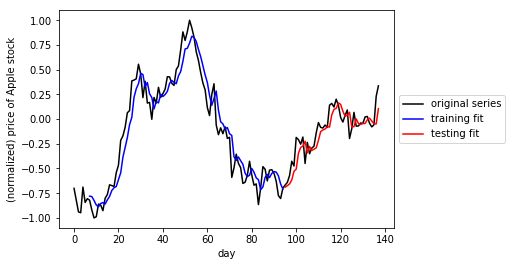

In [12]:
### Plot everything - the original series as well as predictions on training and testing sets
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
plt.plot(dataset,color = 'k')

# plot training set prediction
split_pt = train_test_split + window_size 
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('(normalized) price of Apple stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Note:** you can try out any time series for this exercise!  If you would like to try another see e.g., [this site containing thousands of time series](https://datamarket.com/data/list/?q=provider%3Atsdl) and pick another one!

# Problem 2: Create a sequence generator

## 2.1  Getting started

In this project you will implement a popular Recurrent Neural Network (RNN) architecture to create an English language sequence generator capable of building semi-coherent English sentences from scratch by building them up character-by-character.  This will require a substantial amount amount of parameter tuning on a large training corpus (at least 100,000 characters long).  In particular for this project we will be using a complete version of Sir Arthur Conan Doyle's classic book The Adventures of Sherlock Holmes.

How can we train a machine learning model to generate text automatically, character-by-character?  *By showing the model many training examples so it can learn a pattern between input and output.*  With this type of text generation each input is a string of valid characters like this one

*dogs are grea*

while the corresponding output is the next character in the sentence - which here is 't' (since the complete sentence is 'dogs are great').  We need to show a model many such examples in order for it to make reasonable predictions.

**Fun note:** For those interested in how text generation is being used check out some of the following fun resources:

- [Generate wacky sentences](http://www.cs.toronto.edu/~ilya/rnn.html) with this academic RNN text generator

- Various twitter bots that tweet automatically generated text like[this one](http://tweet-generator-alex.herokuapp.com/).

- the [NanoGenMo](https://github.com/NaNoGenMo/2016) annual contest to automatically produce a 50,000+ novel automatically

- [Robot Shakespeare](https://github.com/genekogan/RobotShakespeare) a text generator that automatically produces Shakespear-esk sentences

## 2.2  Preprocessing a text dataset

Our first task is to get a large text corpus for use in training, and on it we perform a several light pre-processing tasks.  The default corpus we will use is the classic book Sherlock Holmes, but you can use a variety of others as well - so long as they are fairly large (around 100,000 characters or more).  

In [27]:
# read in the text, transforming everything to lower case
text = open('datasets/holmes.txt', encoding='latin1').read().lower()
print('our original text has ' + str(len(text)) + ' characters')

our original text has 581881 characters


Next, lets examine a bit of the raw text.  Because we are interested in creating sentences of English words automatically by building up each word character-by-character, we only want to train on valid English words.  In other words - we need to remove all of the other characters that are not part of English words.

In [28]:
### print out the first 1000 characters of the raw text to get a sense of what we need to throw out
text[:1000]

"ï»¿project gutenberg's the adventures of sherlock holmes, by arthur conan doyle\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.net\n\n\ntitle: the adventures of sherlock holmes\n\nauthor: arthur conan doyle\n\nposting date: april 18, 2011 [ebook #1661]\nfirst posted: november 29, 2002\n\nlanguage: english\n\n\n*** start of this project gutenberg ebook the adventures of sherlock holmes ***\n\n\n\n\nproduced by an anonymous project gutenberg volunteer and jose menendez\n\n\n\n\n\n\n\n\n\nthe adventures of sherlock holmes\n\nby\n\nsir arthur conan doyle\n\n\n\n   i. a scandal in bohemia\n  ii. the red-headed league\n iii. a case of identity\n  iv. the boscombe valley mystery\n   v. the five orange pips\n  vi. the man with the twisted lip\n vii. the adventure of the blue carbuncle\nviii. 

Wow - there's a lot of junk here (i.e., weird uncommon character combinations - as this first character chunk contains the title and author page, as well as table of contents)!  To keep things simple, we want to train our RNN on a large chunk of more typical English sentences - we don't want it to start thinking non-english words or strange characters are valid! - so lets clean up the data a bit.

First, since the dataset is so large and the first few hundred characters contain a lot of junk, lets cut it out.  Lets also find-and-replace those newline tags with empty spaces.

In [29]:
### find and replace '\n' and '\r' symbols - replacing them 
text = text[1302:]
text = text.replace('\n',' ')    # replacing '\n' with '' simply removes the sequence
text = text.replace('\r',' ')

Lets see how the first 1000 characters of our text looks now!

In [30]:
### print out the first 1000 characters of the raw text to get a sense of what we need to throw out
text[:1000]

" his eyes she eclipses and predominates the whole of her sex. it was not that he felt any emotion akin to love for irene adler. all emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. he was, i take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. he never spoke of the softer passions, save with a gibe and a sneer. they were admirable things for the observer--excellent for drawing the veil from men's motives and actions. but for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not be more disturbing than a strong emotion in a nature such as his. and yet there was but one woman to him, and that woman was the late irene

<a id='TODO_3'></a>

#### TODO: finish cleaning the text

Lets make sure we haven't left any other atypical characters (commas, periods, etc., are ok) lurking around in the depths of the text.  You can do this by enumerating all the text's unique characters, examining them, and then replacing any unwanted characters with empty spaces!  Once we find all of the text's unique characters, we can remove all of the atypical ones in the next cell.  Note: don't remove the punctuation marks given in my_answers.py.

In [31]:
### TODO: implement cleaned_text in my_answers.py
from my_answers import cleaned_text
text = cleaned_text(text)

# shorten any extra dead space created above
text = text.replace('  ',' ')

With your chosen characters removed print out the first few hundred lines again just to double check that everything looks good.

In [32]:
### print out the first 2000 characters of the raw text to get a sense of what we need to throw out
text[:20000]

' his eyes she eclipses and predominates the whole of her sex. it was not that he felt any emotion akin to love for irene adler. all emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. he was, i take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. he never spoke of the softer passions, save with a gibe and a sneer. they were admirable things for the observerexcellent for drawing the veil from mens motives and actions. but for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. grit in a sensitive instrument, or a crack in one of his own highpower lenses, would not be more disturbing than a strong emotion in a nature such as his. and yet there was but one woman to him, and that woman was the late irene adl

Now that we have thrown out a good number of non-English characters/character sequences lets print out some statistics about the dataset - including number of total characters and number of unique characters.

In [33]:
# count the number of unique characters in the text
chars = sorted(list(set(text)))
print("Unique chars: {0}".format(chars))
# print some of the text, as well as statistics
print ("this corpus has " +  str(len(text)) + " total number of characters")
print ("this corpus has " +  str(len(chars)) + " unique characters")

Unique chars: [' ', '!', ',', '.', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
this corpus has 569171 total number of characters
this corpus has 33 unique characters


## 2.3  Cutting data into input/output pairs

Now that we have our text all cleaned up, how can we use it to train a model to generate sentences automatically?  First we need to train a machine learning model - and in order to do that we need a set of input/output pairs for a model to train on.  How can we create a set of input/output pairs from our text to train on?

Remember in part 1 of this notebook how we used a sliding window to extract input/output pairs from a time series?  We do the same thing here!  We slide a window of length $T$ along our giant text corpus - everything in the window becomes one input while the character following becomes its corresponding output.  This process of extracting input/output pairs is illustrated in the gif below on a small example text using a window size of T = 5.

<img src="images/text_windowing_training.gif" width=400 height=400/>

Notice one aspect of the sliding window in this gif that does not mirror the analogous gif for time series shown in part 1 of the notebook - we do not need to slide the window along one character at a time but can move by a fixed step size $M$ greater than 1 (in the gif indeed $M = 1$).  This is done with large input texts (like ours which has over 500,000 characters!) when sliding the window along one character at a time we would create far too many input/output pairs to be able to reasonably compute with.

More formally lets denote our text corpus - which is one long string of characters - as follows

$$s_{0},s_{1},s_{2},...,s_{P}$$

where $P$ is the length of the text (again for our text $P \approx 500,000!$).  Sliding a window of size T = 5 with a step length of M = 1 (these are the parameters shown in the gif above) over this sequence produces the following list of input/output pairs


$$\begin{array}{c|c}
\text{Input} & \text{Output}\\
\hline \color{CornflowerBlue} {\langle s_{1},s_{2},s_{3},s_{4},s_{5}\rangle} & \color{Goldenrod}{ s_{6}} \\
\ \color{CornflowerBlue} {\langle s_{2},s_{3},s_{4},s_{5},s_{6} \rangle } & \color{Goldenrod} {s_{7} } \\
\color{CornflowerBlue}  {\vdots} & \color{Goldenrod} {\vdots}\\
\color{CornflowerBlue} { \langle s_{P-5},s_{P-4},s_{P-3},s_{P-2},s_{P-1} \rangle } & \color{Goldenrod} {s_{P}}
\end{array}$$

Notice here that each input is a sequence (or vector) of 5 characters (and in general has length equal to the window size T) while each corresponding output is a single character.  We created around P total number of input/output pairs  (for general step size M we create around ceil(P/M) pairs).

<a id='TODO_4'></a>

Now its time for you to window the input time series as described above! 

**TODO:** Create a function that runs a sliding window along the input text and creates associated input/output pairs.  A skeleton function has been provided for you.  Note that this function should input a) the text  b) the window size and c) the step size, and return the input/output sequences.  Note: the return items should be *lists* - not numpy arrays.

(remember to copy your completed function into the script *my_answers.py* function titled *window_transform_text* before submitting your project)

In [34]:
### TODO: implement window_transform_series in my_answers.py
from my_answers import window_transform_series

With our function complete we can now use it to produce input/output pairs!  We employ the function in the next cell, where the window_size = 50 and step_size = 5.

In [35]:
# run your text window-ing function 
window_size = 50
step_size = 5
inputs, outputs = window_transform_text(text,window_size,step_size)

Lets print out a few input/output pairs to verify that we have made the right sort of stuff!

In [36]:
# print out a few of the input/output pairs to verify that we've made the right kind of stuff to learn from
print('input = ' + inputs[2])
print('output = ' + outputs[2])
print('--------------')
print('input = ' + inputs[100])
print('output = ' + outputs[100])

input = she eclipses and predominates the whole of her sex
output = .
--------------
input = rverexcellent for drawing the veil from mens motiv
output = e


Looks good!

## 2.4  Wait, what kind of problem is text generation again?

In part 1 of this notebook we used the same pre-processing technique - the sliding window - to produce a set of training input/output pairs to tackle the problem of time series prediction *by treating the problem as one of regression*.  So what sort of problem do we have here now, with text generation?  Well, the time series prediction was a regression problem because the output (one value of the time series) was a continuous value.  Here - for character-by-character text generation - each output is a *single character*.  This isn't a continuous value - but a distinct class - therefore **character-by-character text generation is a classification problem**.  

How many classes are there in the data?  Well, the number of classes is equal to the number of unique characters we have to predict!  How many of those were there in our dataset again?  Lets print out the value again.

In [37]:
# print out the number of unique characters in the dataset
chars = sorted(list(set(text)))
print ("this corpus has " +  str(len(chars)) + " unique characters")
print ('and these characters are ')
print (chars)

this corpus has 33 unique characters
and these characters are 
[' ', '!', ',', '.', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


Rockin' - so we have a multiclass classification problem on our hands!

## 2.5  One-hot encoding characters

The last issue we have to deal with is representing our text data as numerical data so that we can use it as an input to a neural network. One of the conceptually simplest ways of doing this is via a 'one-hot encoding' scheme.  Here's how it works.

We transform each character in our inputs/outputs into a vector with length equal to the number of unique characters in our text.  This vector is all zeros except one location where we place a 1 - and this location is unique to each character type.  e.g., we transform 'a', 'b', and 'c' as follows

$$a\longleftarrow\left[\begin{array}{c}
1\\
0\\
0\\
\vdots\\
0\\
0
\end{array}\right]\,\,\,\,\,\,\,b\longleftarrow\left[\begin{array}{c}
0\\
1\\
0\\
\vdots\\
0\\
0
\end{array}\right]\,\,\,\,\,c\longleftarrow\left[\begin{array}{c}
0\\
0\\
1\\
\vdots\\
0\\
0 
\end{array}\right]\cdots$$

where each vector has 32 entries (or in general: number of entries = number of unique characters in text).

The first practical step towards doing this one-hot encoding is to form a dictionary mapping each unique character to a unique integer, and one dictionary to do the reverse mapping.  We can then use these dictionaries to quickly make our one-hot encodings, as well as re-translate (from integers to characters) the results of our trained RNN classification model.

In [38]:
# this dictionary is a function mapping each unique character to a unique integer
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # map each unique character to unique integer

# this dictionary is a function mapping each unique integer back to a unique character
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # map each unique integer back to unique character

Now we can transform our input/output pairs - consisting of characters - to equivalent input/output pairs made up of one-hot encoded vectors.  In the next cell we provide a function for doing just this: it takes in the raw character input/outputs and returns their numerical versions.  In particular the numerical input is given as $\bf{X}$, and numerical output is given as the $\bf{y}$

In [39]:
# transform character-based input/output into equivalent numerical versions
def encode_io_pairs(text,window_size,step_size):
    # number of unique chars
    chars = sorted(list(set(text)))
    num_chars = len(chars)
    
    # cut up text into character input/output pairs
    inputs, outputs = window_transform_text(text,window_size,step_size)
    
    # create empty vessels for one-hot encoded input/output
    X = np.zeros((len(inputs), window_size, num_chars), dtype=np.bool)
    y = np.zeros((len(inputs), num_chars), dtype=np.bool)
    
    # loop over inputs/outputs and transform and store in X/y
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            X[i, t, chars_to_indices[char]] = 1
        y[i, chars_to_indices[outputs[i]]] = 1
        
    return X,y

Now run the one-hot encoding function by activating the cell below and transform our input/output pairs!

In [40]:
# use your function
window_size = 100
step_size = 5
X,y = encode_io_pairs(text,window_size,step_size)

<a id='TODO_5'></a>

## 2.6 Setting up our RNN

With our dataset loaded and the input/output pairs extracted / transformed we can now begin setting up our RNN for training.  Again we will use Keras to quickly build a single hidden layer RNN - where our hidden layer consists of LSTM modules.

Time to get to work: build a 3 layer RNN model of the following specification

- layer 1 should be an LSTM module with 200 hidden units --> note this should have input_shape = (window_size,len(chars)) where len(chars) = number of unique characters in your cleaned text
- layer 2 should be a linear module, fully connected, with len(chars) hidden units --> where len(chars) = number of unique characters in your cleaned text
- layer 3 should be a softmax activation ( since we are solving a *multiclass classification*)
- Use the **categorical_crossentropy** loss 

This network can be constructed using just a few lines - as with the RNN network you made in part 1 of this notebook.  See e.g., the [general Keras documentation](https://keras.io/getting-started/sequential-model-guide/) and the [LSTM documentation in particular](https://keras.io/layers/recurrent/) for examples of how to quickly use Keras to build neural network models.

In [41]:
### necessary functions from the keras library
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import keras
import random

# TODO implement build_part2_RNN in my_answers.py
from my_answers import build_part2_RNN

model = build_part2_RNN(window_size, len(chars))

# initialize optimizer
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile model --> make sure initialized optimizer and callbacks - as defined above - are used
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

## 2.7  Training our RNN model for text generation

With our RNN setup we can now train it!  Lets begin by trying it out on a small subset of the larger version.  In the next cell we take the first 10,000 input/output pairs from our training database to learn on.

In [42]:
# a small subset of our input/output pairs
Xsmall = X[:10000,:,:]
ysmall = y[:10000,:]

Now lets fit our model!

In [43]:
# train the model
model.fit(Xsmall, ysmall, batch_size=500, epochs=40,verbose = 1)

# save weights
model.save_weights('model_weights/best_RNN_small_textdata_weights.hdf5')

Epoch 1/40
10000/10000 [==============================] - 4s - loss: 3.0303     
Epoch 2/40
10000/10000 [==============================] - 4s - loss: 2.8946     
Epoch 3/40
10000/10000 [==============================] - 4s - loss: 2.8693     
Epoch 4/40
10000/10000 [==============================] - 4s - loss: 2.8355     
Epoch 5/40
10000/10000 [==============================] - 4s - loss: 2.7831     
Epoch 6/40
10000/10000 [==============================] - 4s - loss: 2.7089     
Epoch 7/40
10000/10000 [==============================] - 4s - loss: 2.6385     
Epoch 8/40
10000/10000 [==============================] - 4s - loss: 2.5742     
Epoch 9/40
10000/10000 [==============================] - 4s - loss: 2.5123     
Epoch 10/40
10000/10000 [==============================] - 4s - loss: 2.4618     
Epoch 11/40
10000/10000 [==============================] - 4s - loss: 2.4174     
Epoch 12/40
10000/10000 [==============================] - 4s - loss: 2.3769     
Epoch 13/40
10000/10000 [

How do we make a given number of predictions (characters) based on this fitted model?   

First we predict the next character after following any chunk of characters in the text of length equal to our chosen window size.  Then we remove the first character in our input sequence and tack our prediction onto the end.  This gives us a slightly changed sequence of inputs that still has length equal to the size of our window.  We then feed in this updated input sequence into the model to predict the another character.  Together then we have two predicted characters following our original input sequence.  Repeating this process N times gives us N predicted characters.

In the next Python cell we provide you with a completed function that does just this - it makes predictions when given a) a trained RNN model, b) a subset of (window_size) characters from the text, and c) a number of characters to predict (to follow our input subset).

In [44]:
# function that uses trained model to predict a desired number of future characters
def predict_next_chars(model,input_chars,num_to_predict):     
    # create output
    predicted_chars = ''
    for i in range(num_to_predict):
        # convert this round's predicted characters to numerical input    
        x_test = np.zeros((1, window_size, len(chars)))
        for t, char in enumerate(input_chars):
            x_test[0, t, chars_to_indices[char]] = 1.

        # make this round's prediction
        test_predict = model.predict(x_test,verbose = 0)[0]

        # translate numerical prediction back to characters
        r = np.argmax(test_predict)                           # predict class of each test input
        d = indices_to_chars[r] 

        # update predicted_chars and input
        predicted_chars+=d
        input_chars+=d
        input_chars = input_chars[1:]
    return predicted_chars

<a id='TODO_6'></a>

With your trained model try a few subsets of the complete text as input - note the length of each must be exactly equal to the window size.  For each subset use the function above to predict the next 100 characters that follow each input.

In [45]:
# TODO: choose an input sequence and use the prediction function in the previous Python cell to predict 100 characters following it
# get an appropriately sized chunk of characters from the text
start_inds = [100]

# load in weights
model.load_weights('model_weights/best_RNN_small_textdata_weights.hdf5')
for s in start_inds:
    start_index = s
    input_chars = text[start_index: start_index + window_size]

    # use the prediction function
    predict_input = predict_next_chars(model,input_chars,num_to_predict = 100)

    # print out input characters
    print('------------------')
    input_line = 'input chars = ' + '\n' +  input_chars + '"' + '\n'
    print(input_line)

    # print out predicted characters
    line = 'predicted chars = ' + '\n' +  predict_input + '"' + '\n'
    print(line)

------------------
input chars = 
in to love for irene adler. all emotions, and that one particularly, were abhorrent to his cold, pre"

predicted chars = 
chind of the with nouge to mand war are anderette the whas sered and bertote the wis the sare and re"



This looks ok, but not great.  Now lets try the same experiment with a larger chunk of the data - with the first 100,000 input/output pairs.  

Tuning RNNs for a typical character dataset like the one we will use here is a computationally intensive endeavour and thus timely on a typical CPU.  Using a reasonably sized cloud-based GPU can speed up training by a factor of 10.  Also because of the long training time it is highly recommended that you carefully write the output of each step of your process to file.  This is so that all of your results are saved even if you close the web browser you're working out of, as the processes will continue processing in the background but variables/output in the notebook system will not update when you open it again.

In the next cell we show you how to create a text file in Python and record data to it.  This sort of setup can be used to record your final predictions.

In [46]:
### A simple way to write output to file
f = open('my_test_output.txt', 'w')              # create an output file to write too
f.write('this is only a test ' + '\n')           # print some output text
x = 2
f.write('the value of x is ' + str(x) + '\n')    # record a variable value
f.close()     

# print out the contents of my_test_output.txt
f = open('my_test_output.txt', 'r')              # create an output file to write too
f.read()

'this is only a test \nthe value of x is 2\n'

With this recording devices we can now more safely perform experiments on larger portions of the text.  In the next cell we will use the first 100,000 input/output pairs to train our RNN model.

First we fit our model to the dataset, then generate text using the trained model in precisely the same generation method applied before on the small dataset.

**Note:** your generated words should be - by and large - more realistic than with the small dataset, but you won't be able to generate perfect English sentences even with this amount of data.  A rule of thumb: your model is working well if you generate sentences that largely contain real English words.

In [49]:
# a small subset of our input/output pairs
Xlarge = X[:100000,:,:]
ylarge = y[:100000,:]

# TODO: fit to our larger dataset
model.fit(Xlarge, ylarge, batch_size=500, epochs=100, verbose=1)

# save weights
model.save_weights('model_weights/best_RNN_large_textdata_weights.hdf5')

Epoch 1/100
100000/100000 [==============================] - 44s - loss: 0.9918    
Epoch 2/100
100000/100000 [==============================] - 44s - loss: 0.9681    
Epoch 3/100
100000/100000 [==============================] - 44s - loss: 0.9466    
Epoch 4/100
100000/100000 [==============================] - 44s - loss: 0.9251    
Epoch 5/100
100000/100000 [==============================] - 44s - loss: 0.9040    
Epoch 6/100
100000/100000 [==============================] - 44s - loss: 0.8841    
Epoch 7/100
100000/100000 [==============================] - 44s - loss: 0.8666    
Epoch 8/100
100000/100000 [==============================] - 44s - loss: 0.8477    
Epoch 9/100
100000/100000 [==============================] - 44s - loss: 0.8312    
Epoch 10/100
100000/100000 [==============================] - 44s - loss: 0.8145    
Epoch 11/100
100000/100000 [==============================] - 44s - loss: 0.7971    
Epoch 12/100
100000/100000 [==============================] - 44s - loss: 

100000/100000 [==============================] - 44s - loss: 0.3265    
Epoch 98/100
100000/100000 [==============================] - 44s - loss: 0.3285    
Epoch 99/100
100000/100000 [==============================] - 44s - loss: 0.3249    
Epoch 100/100
100000/100000 [==============================] - 44s - loss: 0.3235    


In [50]:
# TODO: choose an input sequence and use the prediction function in the previous Python cell to predict 100 characters following it
# get an appropriately sized chunk of characters from the text
start_inds = [100]

# save output
f = open('text_gen_output/RNN_large_textdata_output.txt', 'w')  # create an output file to write too

# load weights
model.load_weights('model_weights/best_RNN_large_textdata_weights.hdf5')
for s in start_inds:
    start_index = s
    input_chars = text[start_index: start_index + window_size]

    # use the prediction function
    predict_input = predict_next_chars(model,input_chars,num_to_predict = 100)

    # print out input characters
    line = '-------------------' + '\n'
    print(line)
    f.write(line)

    input_line = 'input chars = ' + '\n' +  input_chars + '"' + '\n'
    print(input_line)
    f.write(input_line)

    # print out predicted characters
    predict_line = 'predicted chars = ' + '\n' +  predict_input + '"' + '\n'
    print(predict_line)
    f.write(predict_line)
f.close()

-------------------

input chars = 
in to love for irene adler. all emotions, and that one particularly, were abhorrent to his cold, pre"

predicted chars = 
cisiably and he happed expetured hoss. than you hive his ard i have the sonceroom, the street, with "

